In [64]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
import psycopg2

import os
import warnings 
warnings.filterwarnings('ignore')

In [27]:
path = "../data/processed/"

# Get all CSV files in the folder
files = [f for f in os.listdir(path) if f.endswith(".csv")]

dfs = []
for file in files:
    full_path = os.path.join(path, file)
    
    # Load CSV
    temp_df = pd.read_csv(full_path)
    
    # Add a column to track source file
    temp_df['source'] = file
    
    dfs.append(temp_df)

# Concatenate all DataFrames
df = pd.concat(dfs, ignore_index=True)

print(f"Loaded {len(df)} rows from {len(files)} files.")


Loaded 1182 rows from 3 files.


In [28]:
df

,Unnamed: 0,country_name,country_code,indicator_code,indicator_name,year,value,source
0,0,Afghanistan,AF,NY.GDP.MKTP.CD,GDP (current US$),2018,1.805322e+10,south_asia_economic_metric_2018_to_2019.csv
1,1,Afghanistan,AF,NY.GDP.MKTP.CD,GDP (current US$),2019,1.879944e+10,south_asia_economic_metric_2018_to_2019.csv
2,2,Bangladesh,BD,NY.GDP.MKTP.CD,GDP (current US$),2018,3.213628e+11,south_asia_economic_metric_2018_to_2019.csv
3,3,Bangladesh,BD,NY.GDP.MKTP.CD,GDP (current US$),2019,3.512317e+11,south_asia_economic_metric_2018_to_2019.csv
4,4,Bhutan,BT,NY.GDP.MKTP.CD,GDP (current US$),2018,2.583336e+09,south_asia_economic_metric_2018_to_2019.csv
...,...,...,...,...,...,...,...,...
1177,849,India,IND,SL.UEM.TOTL.ZS,"Unemployment, total (% of total labor force) (...",2018,2.551000e+00,south_asia_economic_metric_2000_to_2018.csv
1178,850,Maldives,MDV,SL.UEM.TOTL.ZS,"Unemployment, total (% of total labor force) (...",2018,6.075000e+00,south_asia_economic_metric_2000_to_2018.csv
1179,851,Nepal,NPL,SL.UEM.TOTL.ZS,"Unemployment, total (% of total labor force) (...",2018,1.264000e+00,south_asia_economic_metric_2000_to_2018.csv
1180,852,Pakistan,PAK,SL.UEM.TOTL.ZS,"Unemployment, total (% of total labor force) (...",2018,3.038000e+00,south_asia_economic_metric_2000_to_2018.csv


In [29]:
df.shape

(1182, 8)

In [30]:
df.info()

<class 'pandas.DataFrame'>
RangeIndex: 1182 entries, 0 to 1181
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Unnamed: 0      1182 non-null   int64  
 1   country_name    1182 non-null   str    
 2   country_code    1182 non-null   str    
 3   indicator_code  1182 non-null   str    
 4   indicator_name  1182 non-null   str    
 5   year            1182 non-null   int64  
 6   value           1182 non-null   float64
 7   source          1182 non-null   str    
dtypes: float64(1), int64(2), str(5)
memory usage: 74.0 KB


In [31]:
df.describe()

,Unnamed: 0,year,value
count,1182.000000,1182.000000,1.182000e+03
mean,334.909475,2012.127750,5.047966e+10
std,258.938851,7.110576,3.105812e+11
min,0.000000,2000.000000,-1.810863e+01
25%,100.250000,2006.000000,6.358116e+00
50%,262.500000,2012.000000,1.901357e+02
75%,557.750000,2018.000000,2.826235e+07
max,853.000000,2024.000000,3.909892e+12


In [32]:
df = df.loc[:, ~df.columns.str.contains("^Unnamed")]
df

,country_name,country_code,indicator_code,indicator_name,year,value,source
0,Afghanistan,AF,NY.GDP.MKTP.CD,GDP (current US$),2018,1.805322e+10,south_asia_economic_metric_2018_to_2019.csv
1,Afghanistan,AF,NY.GDP.MKTP.CD,GDP (current US$),2019,1.879944e+10,south_asia_economic_metric_2018_to_2019.csv
2,Bangladesh,BD,NY.GDP.MKTP.CD,GDP (current US$),2018,3.213628e+11,south_asia_economic_metric_2018_to_2019.csv
3,Bangladesh,BD,NY.GDP.MKTP.CD,GDP (current US$),2019,3.512317e+11,south_asia_economic_metric_2018_to_2019.csv
4,Bhutan,BT,NY.GDP.MKTP.CD,GDP (current US$),2018,2.583336e+09,south_asia_economic_metric_2018_to_2019.csv
...,...,...,...,...,...,...,...
1177,India,IND,SL.UEM.TOTL.ZS,"Unemployment, total (% of total labor force) (...",2018,2.551000e+00,south_asia_economic_metric_2000_to_2018.csv
1178,Maldives,MDV,SL.UEM.TOTL.ZS,"Unemployment, total (% of total labor force) (...",2018,6.075000e+00,south_asia_economic_metric_2000_to_2018.csv
1179,Nepal,NPL,SL.UEM.TOTL.ZS,"Unemployment, total (% of total labor force) (...",2018,1.264000e+00,south_asia_economic_metric_2000_to_2018.csv
1180,Pakistan,PAK,SL.UEM.TOTL.ZS,"Unemployment, total (% of total labor force) (...",2018,3.038000e+00,south_asia_economic_metric_2000_to_2018.csv


In [34]:
df.info()

<class 'pandas.DataFrame'>
RangeIndex: 1182 entries, 0 to 1181
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   country_name    1182 non-null   str    
 1   country_code    1182 non-null   str    
 2   indicator_code  1182 non-null   str    
 3   indicator_name  1182 non-null   str    
 4   year            1182 non-null   int64  
 5   value           1182 non-null   float64
 6   source          1182 non-null   str    
dtypes: float64(1), int64(1), str(5)
memory usage: 64.8 KB


In [35]:
df.groupby('indicator_code')['indicator_name'].unique()

indicator_code
FP.CPI.TOTL.ZG              [Inflation, consumer prices (annual %)]
NE.EXP.GNFS.ZS           [Exports of goods and services (% of GDP)]
NY.GDP.MKTP.CD              [GDP (current US$) , GDP (current US$)]
NY.GDP.PCAP.CD                       [GDP per capita (current US$)]
SL.UEM.TOTL.ZS    [Unemployment, total (% of total labor force) ...
SP.POP.TOTL                 [Population, total , Population, total]
Name: indicator_name, dtype: object

In [36]:
standard_names = {
    "FP.CPI.TOTL.ZG": "Inflation, consumer prices (annual %)",
    "NE.EXP.GNFS.ZS": "Exports of goods and services (% of GDP)",
    "NY.GDP.MKTP.CD": "GDP (current US$) ",
    "NY.GDP.PCAP.CD": "GDP per capita (current US$)",
    "SL.UEM.TOTL.ZS": "Unemployment, total (% of total labor force) (modeled ILO estimate) ",
    "SP.POP.TOTL": "Population, total "
}

df['indicator_name'] = df['indicator_code'].map(standard_names)
df.groupby('indicator_code')['indicator_name'].value_counts()

indicator_code  indicator_name                                                      
FP.CPI.TOTL.ZG  Inflation, consumer prices (annual %)                                   194
NE.EXP.GNFS.ZS  Exports of goods and services (% of GDP)                                188
NY.GDP.MKTP.CD  GDP (current US$)                                                       196
NY.GDP.PCAP.CD  GDP per capita (current US$)                                            196
SL.UEM.TOTL.ZS  Unemployment, total (% of total labor force) (modeled ILO estimate)     208
SP.POP.TOTL     Population, total                                                       200
Name: count, dtype: int64

In [37]:
df.groupby('country_code')['country_name'].value_counts()

country_code  country_name
AF            Afghanistan      10
AFG           Afghanistan     125
BD            Bangladesh       12
BGD           Bangladesh      139
BT            Bhutan           12
BTN           Bhutan          136
IN            India            12
IND           India           139
LK            Sri Lanka        12
LKA           Sri Lanka       139
MDV           Maldives        132
MV            Maldives         12
NP            Nepal            12
NPL           Nepal           139
PAK           Pakistan        139
PK            Pakistan         12
Name: count, dtype: int64

In [38]:
preferred_country_codes = {
    "Afghanistan": "AFG",
    "Bangladesh": "BGD",
    "Bhutan": "BTN",
    "India": "IND",
    "Sri Lanka": "LKA",
    "Maldives": "MDV",
    "Nepal": "NPL",
    "Pakistan": "PAK"
}

df['country_code'] = df['country_name'].map(preferred_country_codes)
df.groupby('country_code')['country_name'].unique()

country_code
AFG    [Afghanistan]
BGD     [Bangladesh]
BTN         [Bhutan]
IND          [India]
LKA      [Sri Lanka]
MDV       [Maldives]
NPL          [Nepal]
PAK       [Pakistan]
Name: country_name, dtype: object

In [39]:
df = (
    df
    .sort_values(
        by=["country_code", "indicator_code", "year"],
        ascending=[True, True, True]
    )
    .reset_index(drop=True)
)
df

,country_name,country_code,indicator_code,indicator_name,year,value,source
0,Afghanistan,AFG,FP.CPI.TOTL.ZG,"Inflation, consumer prices (annual %)",2005,1.268627e+01,south_asia_economic_metric_2000_to_2018.csv
1,Afghanistan,AFG,FP.CPI.TOTL.ZG,"Inflation, consumer prices (annual %)",2006,6.784597e+00,south_asia_economic_metric_2000_to_2018.csv
2,Afghanistan,AFG,FP.CPI.TOTL.ZG,"Inflation, consumer prices (annual %)",2007,8.680571e+00,south_asia_economic_metric_2000_to_2018.csv
3,Afghanistan,AFG,FP.CPI.TOTL.ZG,"Inflation, consumer prices (annual %)",2008,2.641866e+01,south_asia_economic_metric_2000_to_2018.csv
4,Afghanistan,AFG,FP.CPI.TOTL.ZG,"Inflation, consumer prices (annual %)",2009,-6.811161e+00,south_asia_economic_metric_2000_to_2018.csv
...,...,...,...,...,...,...,...
1177,Pakistan,PAK,SP.POP.TOTL,"Population, total",2020,2.350017e+08,south_asia_economic_metric_2020_to_2024.csv
1178,Pakistan,PAK,SP.POP.TOTL,"Population, total",2021,2.394778e+08,south_asia_economic_metric_2020_to_2024.csv
1179,Pakistan,PAK,SP.POP.TOTL,"Population, total",2022,2.437007e+08,south_asia_economic_metric_2020_to_2024.csv
1180,Pakistan,PAK,SP.POP.TOTL,"Population, total",2023,2.475045e+08,south_asia_economic_metric_2020_to_2024.csv


#### check for the missing value

In [46]:
# Count missing values per column
missing_counts = df.isna().sum()

# Percentage of missing per column
missing_percent = (df.isna().mean() * 100).round(2)

# Combine into a DataFrame for easy inspection
missing_summary = pd.DataFrame({
    'missing_count': missing_counts,
    'missing_percent': missing_percent
}).sort_values('missing_percent', ascending=False)

print(missing_summary)


                missing_count  missing_percent
country_name                0              0.0
country_code                0              0.0
indicator_code              0              0.0
indicator_name              0              0.0
year                        0              0.0
value                       0              0.0
source                      0              0.0


#### check for duplicate values 

In [44]:
df.duplicated().sum()

np.int64(0)

In [48]:
print("\n=== Duplicate / Conflict Check ===")
duplicates = df[df.duplicated(subset=['country_code','indicator_code','year'], keep=False)]
conflicts = duplicates.groupby(['country_code','indicator_code','year'])['value'].nunique().reset_index()
conflicts = conflicts[conflicts['value'] > 1]
if not conflicts.empty:
    print(f"Found {len(conflicts)} conflicts:")
    print(conflicts)
else:
    print("No conflicts detected.")


=== Duplicate / Conflict Check ===
Found 8 conflicts:
  country_code  indicator_code  year  value
0          AFG  SL.UEM.TOTL.ZS  2018      2
1          BGD  SL.UEM.TOTL.ZS  2018      2
2          BTN  SL.UEM.TOTL.ZS  2018      2
3          IND  SL.UEM.TOTL.ZS  2018      2
4          LKA  SL.UEM.TOTL.ZS  2018      2
5          MDV  SL.UEM.TOTL.ZS  2018      2
6          NPL  SL.UEM.TOTL.ZS  2018      2
7          PAK  SL.UEM.TOTL.ZS  2018      2


In [49]:
duplicates = df[df.duplicated(subset=['country_code','indicator_code','year'], keep=False)]
duplicates[duplicates['country_code'].isin(conflicts['country_code'])]

,country_name,country_code,indicator_code,indicator_name,year,value,source
102,Afghanistan,AFG,SL.UEM.TOTL.ZS,"Unemployment, total (% of total labor force) (...",2018,11.192,south_asia_economic_metric_2018_to_2019.csv
103,Afghanistan,AFG,SL.UEM.TOTL.ZS,"Unemployment, total (% of total labor force) (...",2018,1.542,south_asia_economic_metric_2000_to_2018.csv
253,Bangladesh,BGD,SL.UEM.TOTL.ZS,"Unemployment, total (% of total labor force) (...",2018,4.439,south_asia_economic_metric_2018_to_2019.csv
254,Bangladesh,BGD,SL.UEM.TOTL.ZS,"Unemployment, total (% of total labor force) (...",2018,4.308,south_asia_economic_metric_2000_to_2018.csv
401,Bhutan,BTN,SL.UEM.TOTL.ZS,"Unemployment, total (% of total labor force) (...",2018,3.350,south_asia_economic_metric_2018_to_2019.csv
402,Bhutan,BTN,SL.UEM.TOTL.ZS,"Unemployment, total (% of total labor force) (...",2018,2.197,south_asia_economic_metric_2000_to_2018.csv
552,India,IND,SL.UEM.TOTL.ZS,"Unemployment, total (% of total labor force) (...",2018,7.652,south_asia_economic_metric_2018_to_2019.csv
553,India,IND,SL.UEM.TOTL.ZS,"Unemployment, total (% of total labor force) (...",2018,2.551,south_asia_economic_metric_2000_to_2018.csv
703,Sri Lanka,LKA,SL.UEM.TOTL.ZS,"Unemployment, total (% of total labor force) (...",2018,4.318,south_asia_economic_metric_2018_to_2019.csv
704,Sri Lanka,LKA,SL.UEM.TOTL.ZS,"Unemployment, total (% of total labor force) (...",2018,4.399,south_asia_economic_metric_2000_to_2018.csv


In [52]:
# Keeping the data from the latest csv
df_cleaned = df.sort_values('source').drop_duplicates(
    subset=['country_code','indicator_code','year'], keep='last'
)


In [53]:
df

,country_name,country_code,indicator_code,indicator_name,year,value,source
0,Afghanistan,AFG,FP.CPI.TOTL.ZG,"Inflation, consumer prices (annual %)",2005,1.268627e+01,south_asia_economic_metric_2000_to_2018.csv
1,Afghanistan,AFG,FP.CPI.TOTL.ZG,"Inflation, consumer prices (annual %)",2006,6.784597e+00,south_asia_economic_metric_2000_to_2018.csv
2,Afghanistan,AFG,FP.CPI.TOTL.ZG,"Inflation, consumer prices (annual %)",2007,8.680571e+00,south_asia_economic_metric_2000_to_2018.csv
3,Afghanistan,AFG,FP.CPI.TOTL.ZG,"Inflation, consumer prices (annual %)",2008,2.641866e+01,south_asia_economic_metric_2000_to_2018.csv
4,Afghanistan,AFG,FP.CPI.TOTL.ZG,"Inflation, consumer prices (annual %)",2009,-6.811161e+00,south_asia_economic_metric_2000_to_2018.csv
...,...,...,...,...,...,...,...
1177,Pakistan,PAK,SP.POP.TOTL,"Population, total",2020,2.350017e+08,south_asia_economic_metric_2020_to_2024.csv
1178,Pakistan,PAK,SP.POP.TOTL,"Population, total",2021,2.394778e+08,south_asia_economic_metric_2020_to_2024.csv
1179,Pakistan,PAK,SP.POP.TOTL,"Population, total",2022,2.437007e+08,south_asia_economic_metric_2020_to_2024.csv
1180,Pakistan,PAK,SP.POP.TOTL,"Population, total",2023,2.475045e+08,south_asia_economic_metric_2020_to_2024.csv


COUNTRIES ANALYSIS

Total Countries: 8

country_name
Bangladesh     151
India          151
Sri Lanka      151
Nepal          151
Pakistan       151
Bhutan         148
Maldives       144
Afghanistan    135


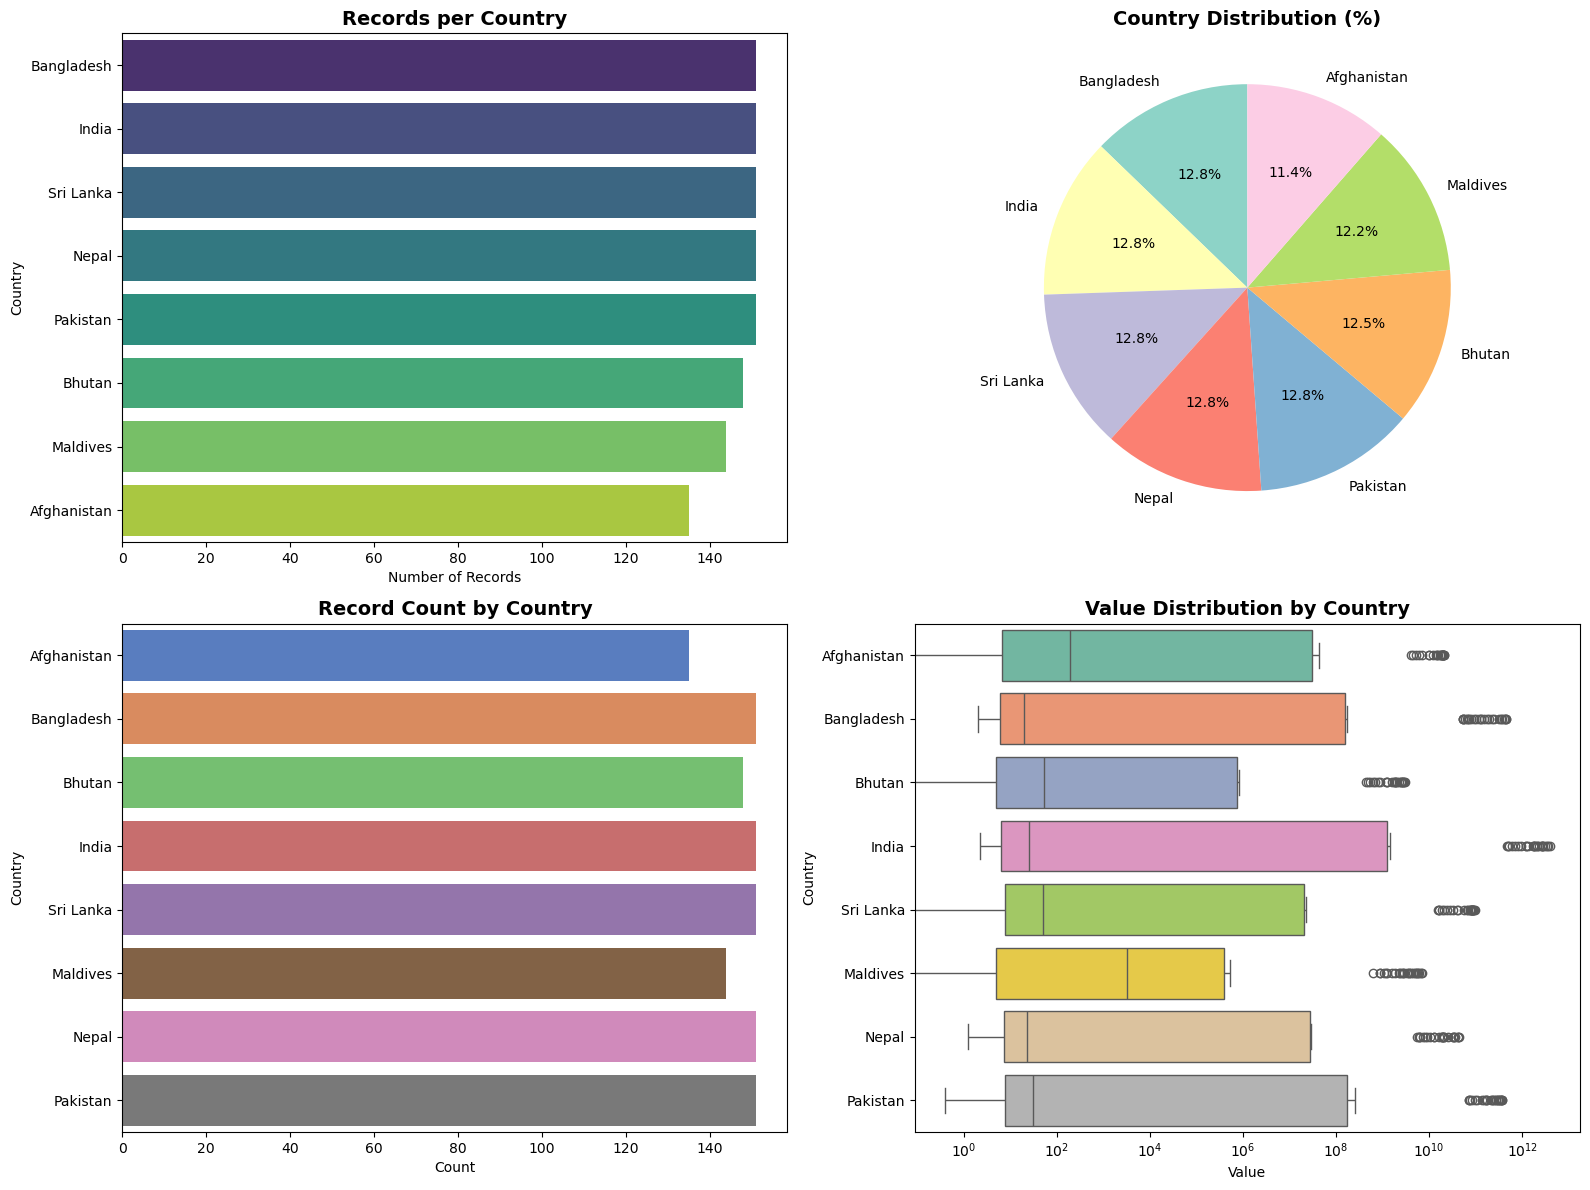

In [55]:
print("="*80)
print("COUNTRIES ANALYSIS")
print("="*80)

country_counts = df['country_name'].value_counts()
print(f"\nTotal Countries: {df['country_name'].nunique()}")
print("\n" + country_counts.to_string())

# Visualizations
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# 1. Horizontal bar chart
sns.barplot(y=country_counts.index, x=country_counts.values, 
            palette='viridis', ax=axes[0, 0])
axes[0, 0].set_title('Records per Country', fontsize=14, fontweight='bold')
axes[0, 0].set_xlabel('Number of Records')
axes[0, 0].set_ylabel('Country')

# 2. Pie chart
colors = sns.color_palette('Set3', len(country_counts))
axes[0, 1].pie(country_counts, labels=country_counts.index, autopct='%1.1f%%', 
              colors=colors, startangle=90)
axes[0, 1].set_title('Country Distribution (%)', fontsize=14, fontweight='bold')

# 3. Count plot with hue
sns.countplot(data=df, y='country_name', palette='muted', ax=axes[1, 0])
axes[1, 0].set_title('Record Count by Country', fontsize=14, fontweight='bold')
axes[1, 0].set_xlabel('Count')
axes[1, 0].set_ylabel('Country')

# 4. Box plot of values by country
sns.boxplot(data=df, y='country_name', x='value', palette='Set2', ax=axes[1, 1])
axes[1, 1].set_title('Value Distribution by Country', fontsize=14, fontweight='bold')
axes[1, 1].set_xlabel('Value')
axes[1, 1].set_ylabel('Country')
axes[1, 1].set_xscale('log')

plt.tight_layout()
plt.show()

INDICATORS ANALYSIS

Total Indicators: 6

indicator_name
Unemployment, total (% of total labor force) (modeled ILO estimate)     208
Population, total                                                       200
GDP (current US$)                                                       196
GDP per capita (current US$)                                            196
Inflation, consumer prices (annual %)                                   194
Exports of goods and services (% of GDP)                                188


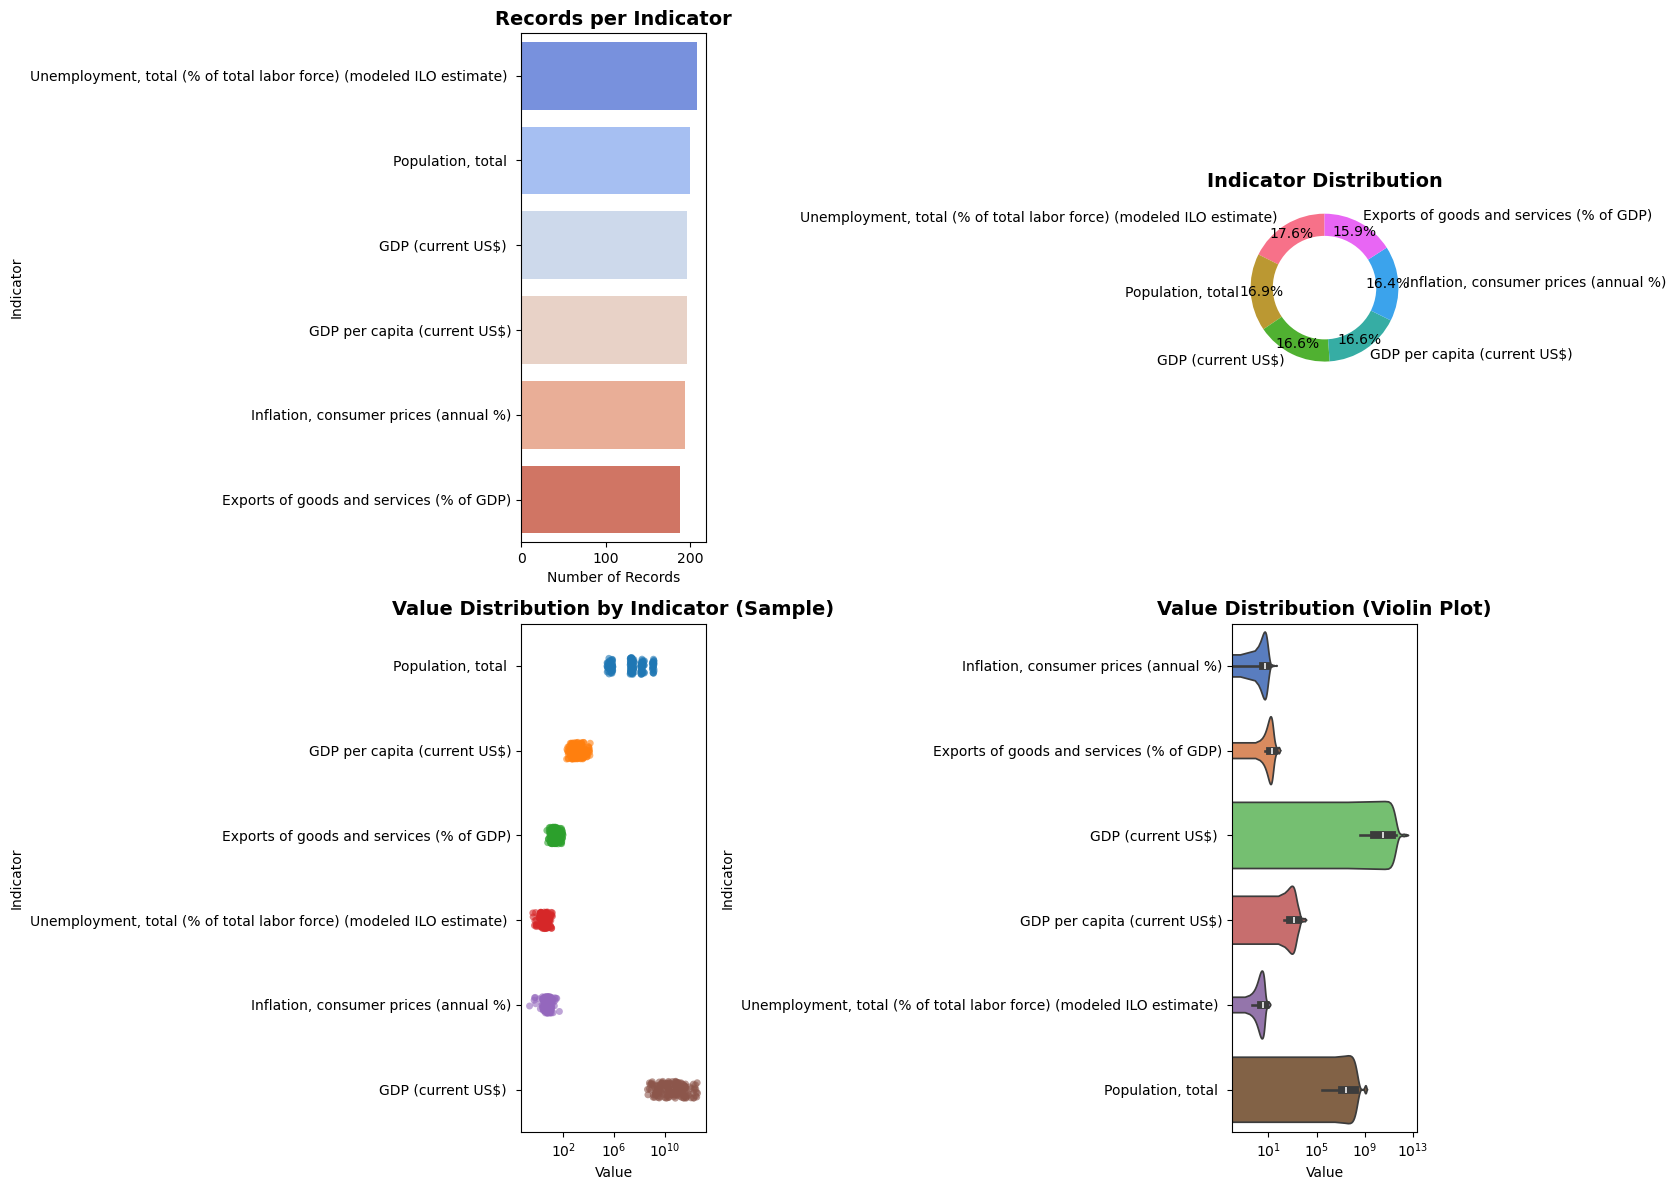

In [56]:
print("="*80)
print("INDICATORS ANALYSIS")
print("="*80)

indicator_counts = df['indicator_name'].value_counts()
print(f"\nTotal Indicators: {df['indicator_name'].nunique()}\n")
print(indicator_counts.to_string())

# Visualizations
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# 1. Horizontal bar chart
sns.barplot(y=indicator_counts.index, x=indicator_counts.values, 
            palette='coolwarm', ax=axes[0, 0])
axes[0, 0].set_title('Records per Indicator', fontsize=14, fontweight='bold')
axes[0, 0].set_xlabel('Number of Records')
axes[0, 0].set_ylabel('Indicator')

# 2. Donut chart
colors = sns.color_palette('husl', len(indicator_counts))
wedges, texts, autotexts = axes[0, 1].pie(indicator_counts, labels=indicator_counts.index, 
                                           autopct='%1.1f%%', colors=colors, startangle=90,
                                           pctdistance=0.85)
centre_circle = plt.Circle((0, 0), 0.70, fc='white')
axes[0, 1].add_artist(centre_circle)
axes[0, 1].set_title('Indicator Distribution', fontsize=14, fontweight='bold')

# 3. Strip plot - value distribution by indicator
sns.stripplot(data=df.sample(min(1000, len(df))), y='indicator_name', x='value', 
             palette='tab10', alpha=0.6, ax=axes[1, 0])
axes[1, 0].set_title('Value Distribution by Indicator (Sample)', fontsize=14, fontweight='bold')
axes[1, 0].set_xlabel('Value')
axes[1, 0].set_ylabel('Indicator')
axes[1, 0].set_xscale('log')

# 4. Violin plot
sns.violinplot(data=df, y='indicator_name', x='value', 
              palette='muted', ax=axes[1, 1])
axes[1, 1].set_title('Value Distribution (Violin Plot)', fontsize=14, fontweight='bold')
axes[1, 1].set_xlabel('Value')
axes[1, 1].set_ylabel('Indicator')
axes[1, 1].set_xscale('log')

plt.tight_layout()
plt.show()

TEMPORAL ANALYSIS

Year Range: 2000 - 2024
Total Years: 25

year
2000    42
2001    43
2002    46
2003    46
2004    46
2005    47
2006    48
2007    48
2008    48
2009    48
2010    48
2011    48
2012    48
2013    48
2014    48
2015    48
2016    48
2017    48
2018    55
2019    47
2020    48
2021    48
2022    48
2023    48
2024    42


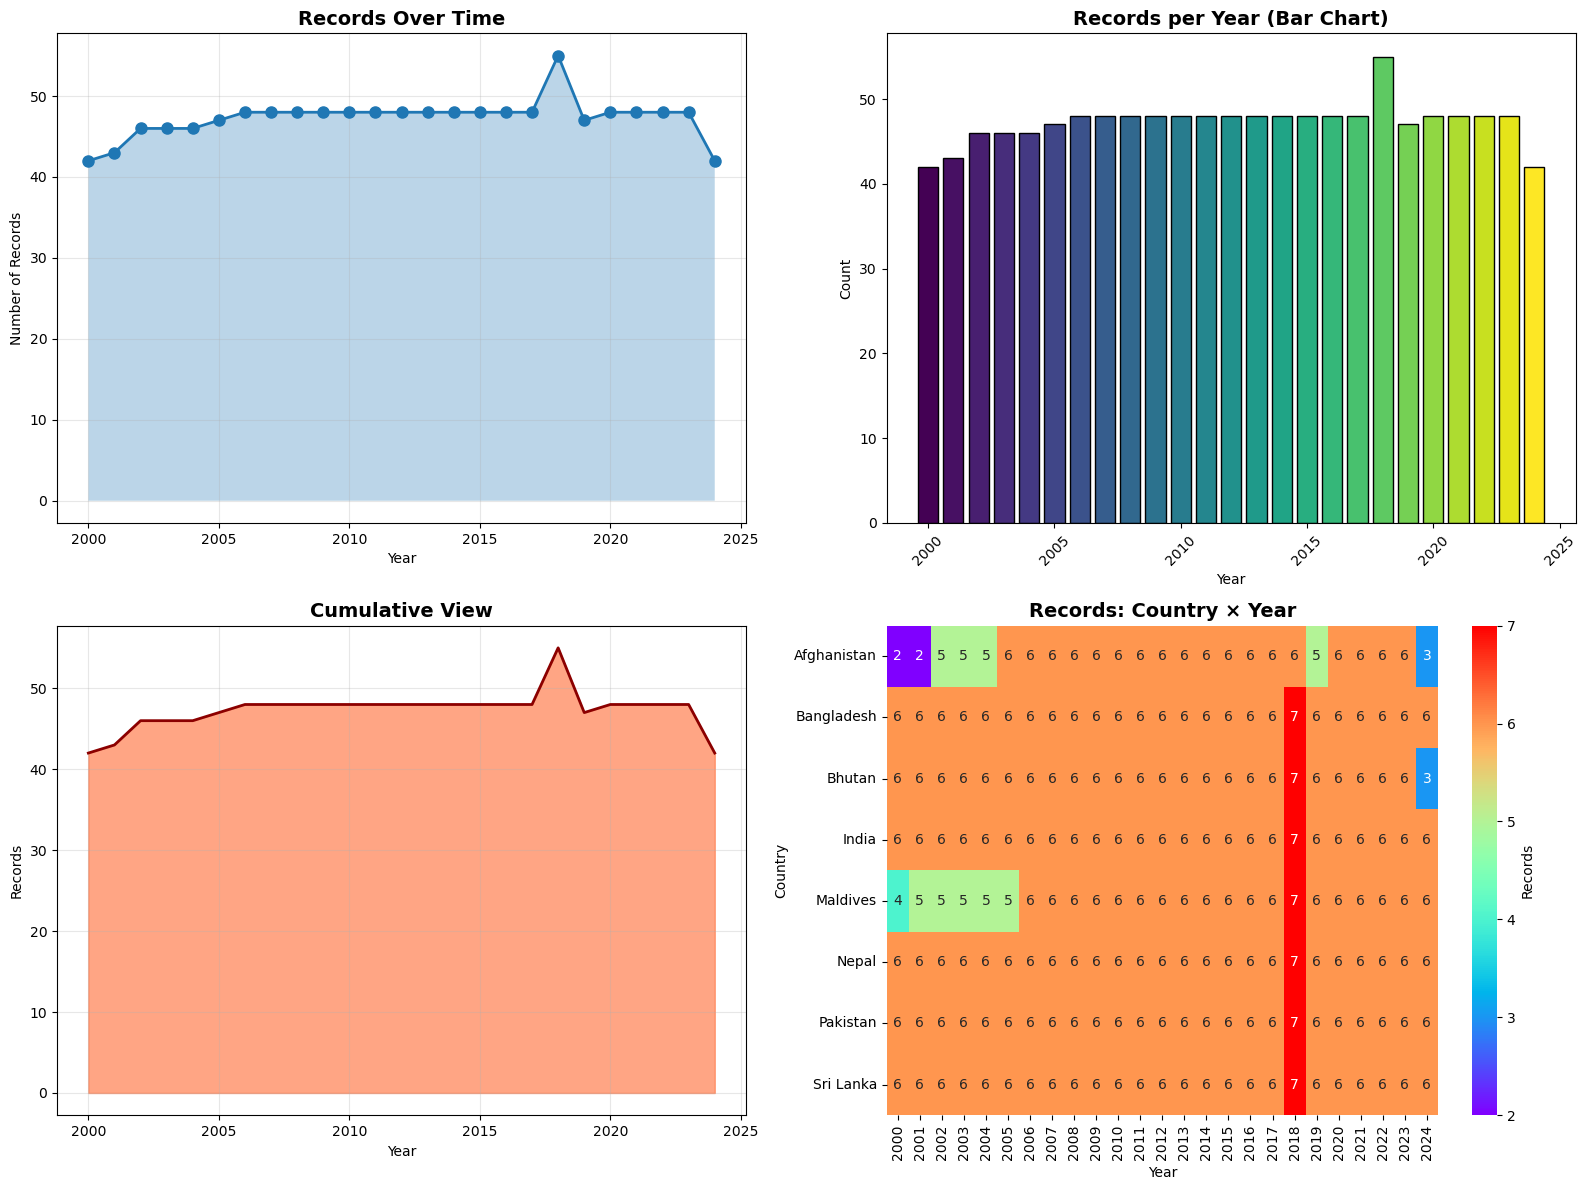

In [58]:
print("="*80)
print("TEMPORAL ANALYSIS")
print("="*80)

year_counts = df['year'].value_counts().sort_index()
print(f"\nYear Range: {df['year'].min()} - {df['year'].max()}")
print(f"Total Years: {df['year'].nunique()}\n")
print(year_counts.to_string())

# Visualizations
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# 1. Line plot - records over time
axes[0, 0].plot(year_counts.index, year_counts.values, marker='o', linewidth=2, markersize=8)
axes[0, 0].fill_between(year_counts.index, year_counts.values, alpha=0.3)
axes[0, 0].set_title('Records Over Time', fontsize=14, fontweight='bold')
axes[0, 0].set_xlabel('Year')
axes[0, 0].set_ylabel('Number of Records')
axes[0, 0].grid(True, alpha=0.3)

# 2. Bar plot with gradient
colors = plt.cm.viridis(np.linspace(0, 1, len(year_counts)))
axes[0, 1].bar(year_counts.index, year_counts.values, color=colors, edgecolor='black')
axes[0, 1].set_title('Records per Year (Bar Chart)', fontsize=14, fontweight='bold')
axes[0, 1].set_xlabel('Year')
axes[0, 1].set_ylabel('Count')
axes[0, 1].tick_params(axis='x', rotation=45)

# 3. Area plot
axes[1, 0].fill_between(year_counts.index, year_counts.values, alpha=0.7, color='coral')
axes[1, 0].plot(year_counts.index, year_counts.values, color='darkred', linewidth=2)
axes[1, 0].set_title('Cumulative View', fontsize=14, fontweight='bold')
axes[1, 0].set_xlabel('Year')
axes[1, 0].set_ylabel('Records')
axes[1, 0].grid(True, alpha=0.3)

# 4. Heatmap - records by year and country
year_country = df.pivot_table(index='country_name', columns='year', 
                              values='value', aggfunc='count', fill_value=0)
sns.heatmap(year_country, annot=True, fmt='g', cmap='rainbow', 
           cbar_kws={'label': 'Records'}, ax=axes[1, 1])
axes[1, 1].set_title('Records: Country × Year', fontsize=14, fontweight='bold')
axes[1, 1].set_xlabel('Year')
axes[1, 1].set_ylabel('Country')

plt.tight_layout()
plt.show()

VALUE DISTRIBUTION ANALYSIS

Statistics:
────────────────────────────────────────────────────────────────────────────────


count    1.182000e+03
mean     5.047966e+10
std      3.105812e+11
min     -1.810863e+01
25%      6.358116e+00
50%      1.901357e+02
75%      2.826235e+07
max      3.909892e+12
Name: value, dtype: float64

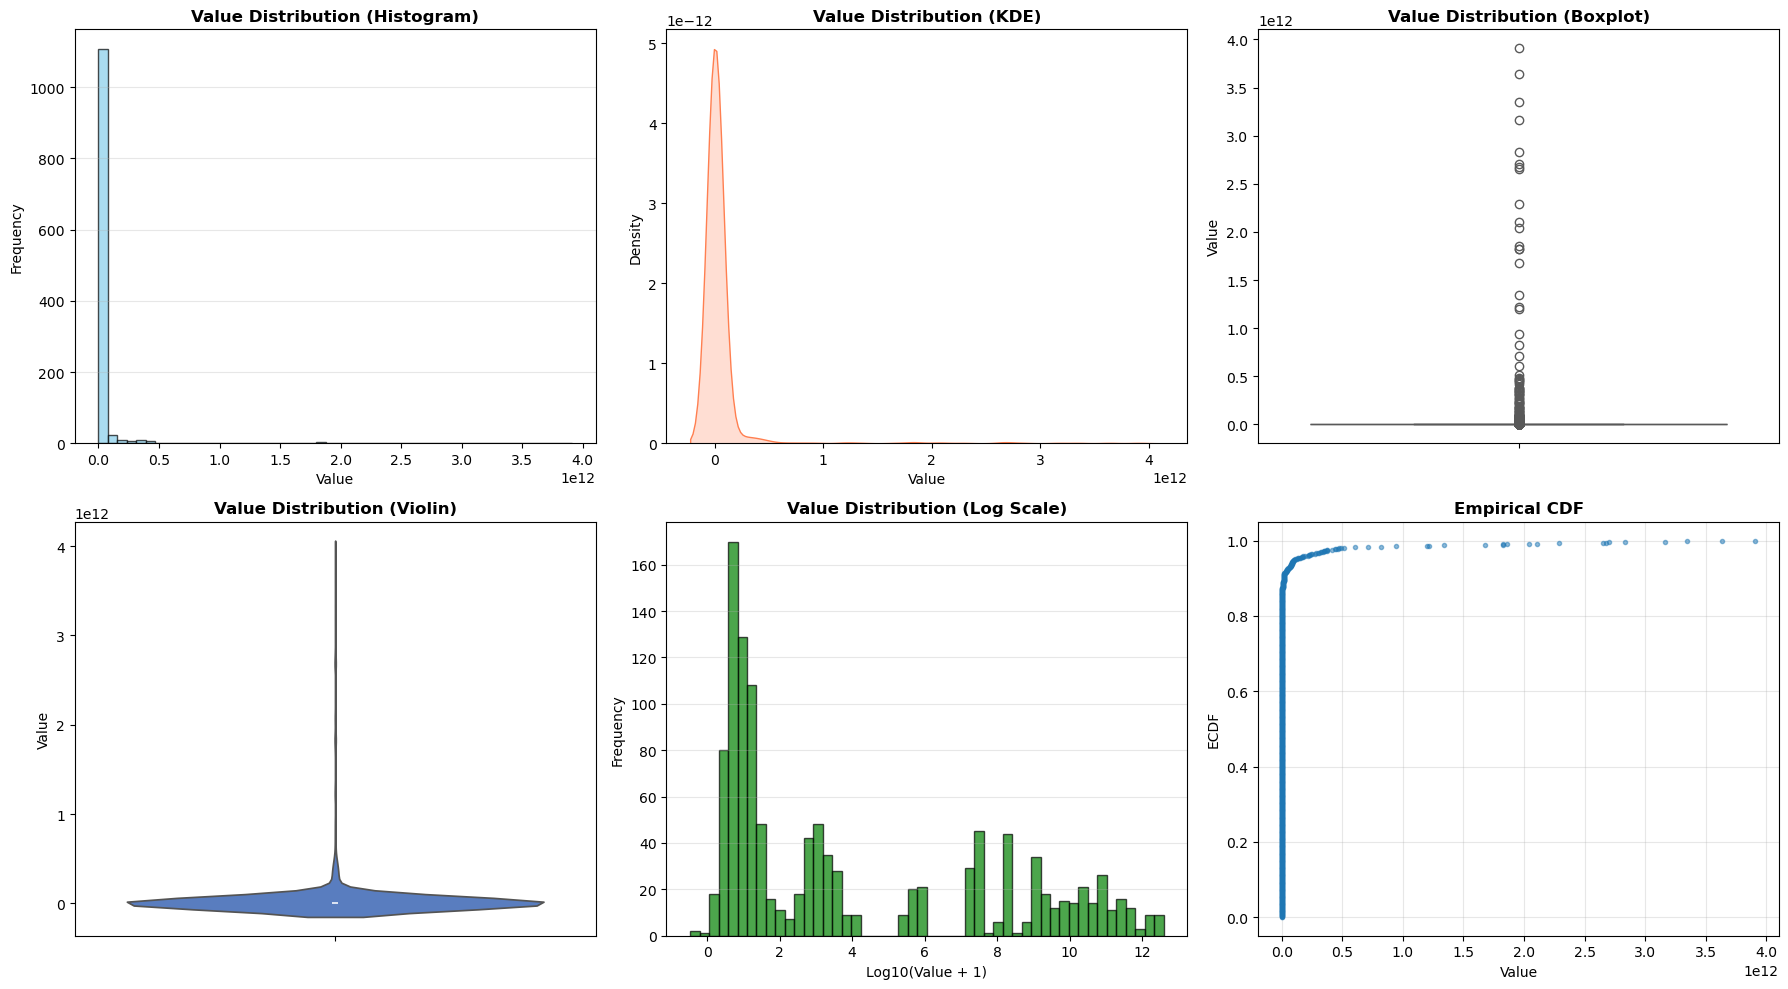

In [59]:
print("="*80)
print("VALUE DISTRIBUTION ANALYSIS")
print("="*80)

print("\nStatistics:")
print("─"*80)
display(df['value'].describe())

# Visualizations
fig, axes = plt.subplots(2, 3, figsize=(18, 10))

# 1. Histogram
axes[0, 0].hist(df['value'], bins=50, color='skyblue', edgecolor='black', alpha=0.7)
axes[0, 0].set_title('Value Distribution (Histogram)', fontsize=12, fontweight='bold')
axes[0, 0].set_xlabel('Value')
axes[0, 0].set_ylabel('Frequency')
axes[0, 0].grid(axis='y', alpha=0.3)

# 2. KDE plot
sns.kdeplot(data=df['value'], fill=True, color='coral', ax=axes[0, 1])
axes[0, 1].set_title('Value Distribution (KDE)', fontsize=12, fontweight='bold')
axes[0, 1].set_xlabel('Value')
axes[0, 1].set_ylabel('Density')

# 3. Box plot
sns.boxplot(y=df['value'], palette='Set2', ax=axes[0, 2])
axes[0, 2].set_title('Value Distribution (Boxplot)', fontsize=12, fontweight='bold')
axes[0, 2].set_ylabel('Value')

# 4. Violin plot
sns.violinplot(y=df['value'], palette='muted', ax=axes[1, 0])
axes[1, 0].set_title('Value Distribution (Violin)', fontsize=12, fontweight='bold')
axes[1, 0].set_ylabel('Value')

# 5. Log scale histogram
axes[1, 1].hist(np.log10(df['value'] + 1), bins=50, color='green', 
               edgecolor='black', alpha=0.7)
axes[1, 1].set_title('Value Distribution (Log Scale)', fontsize=12, fontweight='bold')
axes[1, 1].set_xlabel('Log10(Value + 1)')
axes[1, 1].set_ylabel('Frequency')
axes[1, 1].grid(axis='y', alpha=0.3)

# 6. ECDF
from scipy import stats
sorted_values = np.sort(df['value'])
y = np.arange(1, len(sorted_values) + 1) / len(sorted_values)
axes[1, 2].plot(sorted_values, y, marker='.', linestyle='none', alpha=0.5)
axes[1, 2].set_title('Empirical CDF', fontsize=12, fontweight='bold')
axes[1, 2].set_xlabel('Value')
axes[1, 2].set_ylabel('ECDF')
axes[1, 2].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

TIME SERIES TRENDS BY INDICATOR


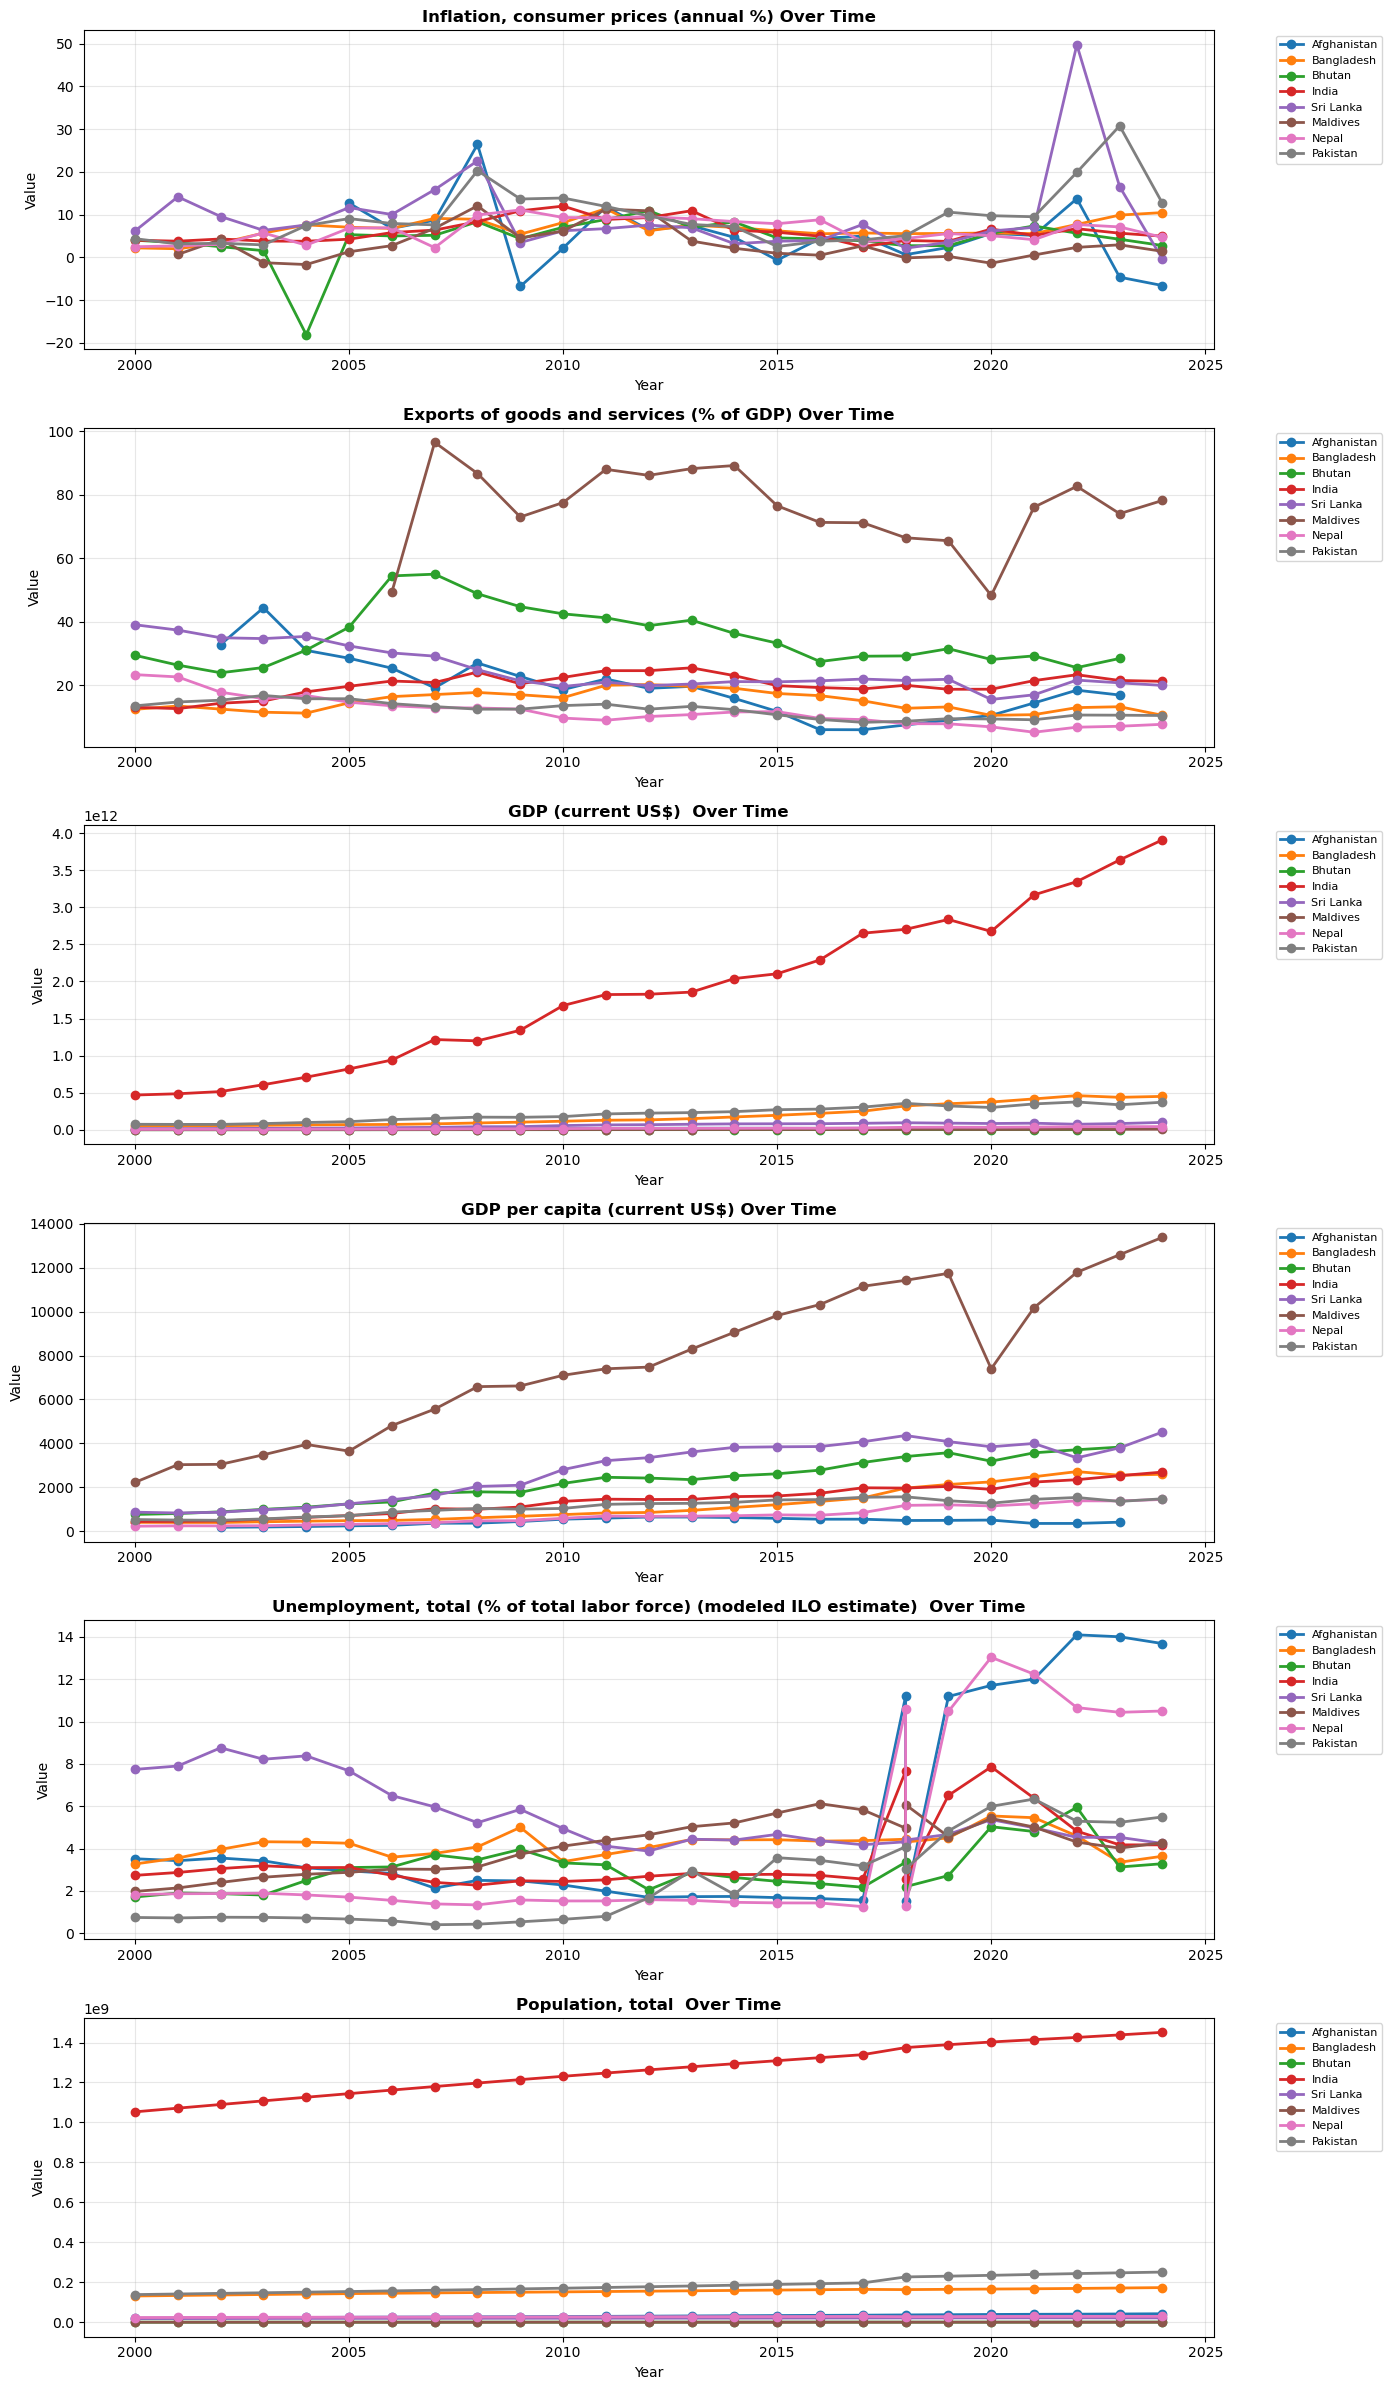

In [62]:
print("="*80)
print("TIME SERIES TRENDS BY INDICATOR")
print("="*80)

# Get unique indicators
indicators = df['indicator_name'].unique()

# Create subplots
n_indicators = len(indicators)
fig, axes = plt.subplots(n_indicators, 1, figsize=(14, 4*n_indicators))

if n_indicators == 1:
    axes = [axes]

for idx, indicator in enumerate(indicators):
    indicator_df = df[df['indicator_name'] == indicator]
    
    # Plot for each country
    for country in indicator_df['country_name'].unique():
        country_data = indicator_df[indicator_df['country_name'] == country]
        country_data = country_data.sort_values('year')
        
        axes[idx].plot(country_data['year'], country_data['value'], 
                      marker='o', label=country, linewidth=2, markersize=6)
    
    axes[idx].set_title(f'{indicator} Over Time', fontsize=12, fontweight='bold')
    axes[idx].set_xlabel('Year')
    axes[idx].set_ylabel('Value')
    axes[idx].legend(bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=8)
    axes[idx].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

In [65]:
DB_PARAMS = {
    'host' : 'localhost',
    'database' : 'glob_market_warehouse', 
    'user' : 'stha_manik', 
    'password' : 'pgadmin', 
    'port' : 5432
}

In [67]:
def create_connection():
    '''Create database connection'''
    try:
        conn = psycopg2.connect(**DB_PARAMS)
        print("Database connection established")
        return conn
    except Exception as e:
        print(f"Connection error: {e}")
        return None

In [68]:
def load_dim_country(conn, df):
    """Load dim_country table"""
    with conn.cursor() as cur:
        print("\n📍 Loading dim_country...")
        countries = df[['country_code', 'country_name']].drop_duplicates()
        
        for _, row in countries.iterrows():
            cur.execute("""
                INSERT INTO dim_country (country_code, country_name, region)
                VALUES (%s, %s, %s)
                ON CONFLICT (country_code) DO NOTHING
            """, (row['country_code'], row['country_name'], 'South Asia'))
        
        conn.commit()
        print(f"✅ Loaded {len(countries)} countries")


In [70]:
def load_dim_indicator(conn, df):
    """Load dim_indicator table"""
    with conn.cursor() as cur:
        print("\n📊 Loading dim_indicator...")
        indicators = df[['indicator_code', 'indicator_name']].drop_duplicates()
        
        indicator_categories = {
            'NY.GDP.MKTP.CD': 'Economic Output',
            'NY.GDP.PCAP.CD': 'Economic Output',
            'FP.CPI.TOTL.ZG': 'Prices & Inflation',
            'SL.UEM.TOTL.ZS': 'Labor Market',
            'SP.POP.TOTL': 'Demographics',
            'NE.EXP.GNFS.ZS': 'Trade'
        }
        
        for _, row in indicators.iterrows():
            category = indicator_categories.get(row['indicator_code'], 'Other')
            cur.execute("""
                INSERT INTO dim_indicator (indicator_code, indicator_name, indicator_category)
                VALUES (%s, %s, %s)
                ON CONFLICT (indicator_code) DO NOTHING
            """, (row['indicator_code'], row['indicator_name'], category))
        
        conn.commit()
        print(f"✅ Loaded {len(indicators)} indicators")


In [79]:
def load_dim_time(conn, df):
    """Load dim_time table"""
    with conn.cursor() as cur:
        print("\n📅 Loading dim_time...")
        years = df['year'].unique()
        
        for year in years:
            year = int(year)       # <-- convert numpy.int64 to int
            decade = (year // 10) * 10
            century = (year // 100) * 100
            cur.execute("""
                INSERT INTO dim_time (year, decade, century)
                VALUES (%s, %s, %s)
                ON CONFLICT (year) DO NOTHING
            """, (year, decade, century))
        
        conn.commit()
        print(f"✅ Loaded {len(years)} years")


In [80]:
def load_dim_source(conn, df):
    """Load dim_source table"""
    with conn.cursor() as cur:
        print("\n📁 Loading dim_source...")
        sources = df['source'].unique()
        
        for source in sources:
            source_type = 'CSV' if 'csv' in source.lower() else 'API' if 'api' in source.lower() else 'Web Scraping'
            cur.execute("""
                INSERT INTO dim_source (source_name, source_type)
                VALUES (%s, %s)
                ON CONFLICT (source_name) DO NOTHING
            """, (source, source_type))
        
        conn.commit()
        print(f"✅ Loaded {len(sources)} sources")


In [81]:
def load_fact_economic_metrics(conn, df):
    """Load fact_economic_metrics table (optimized with key caching)"""
    with conn.cursor() as cur:
        print("\n📈 Loading fact_economic_metrics...")

        # Cache dimension keys in dictionaries
        cur.execute("SELECT country_key, country_code FROM dim_country")
        country_map = {code: key for key, code in cur.fetchall()}

        cur.execute("SELECT indicator_key, indicator_code FROM dim_indicator")
        indicator_map = {code: key for key, code in cur.fetchall()}

        cur.execute("SELECT time_key, year FROM dim_time")
        time_map = {year: key for key, year in cur.fetchall()}

        cur.execute("SELECT source_key, source_name FROM dim_source")
        source_map = {name: key for key, name in cur.fetchall()}

        total_rows = len(df)
        loaded = 0
        skipped = 0

        for idx, row in df.iterrows():
            try:
                country_key = country_map.get(row['country_code'])
                indicator_key = indicator_map.get(row['indicator_code'])
                time_key = time_map.get(int(row['year']))
                source_key = source_map.get(row['source'])

                if None in (country_key, indicator_key, time_key, source_key):
                    skipped += 1
                    continue

                value = float(row['value']) if row['value'] is not None else None

                cur.execute("""
                    INSERT INTO fact_economic_metrics 
                    (country_key, indicator_key, time_key, source_key, value)
                    VALUES (%s, %s, %s, %s, %s)
                    ON CONFLICT (country_key, indicator_key, time_key, source_key) 
                    DO UPDATE SET value = EXCLUDED.value
                """, (country_key, indicator_key, time_key, source_key, value))

                loaded += 1

                if (idx + 1) % 100 == 0:
                    print(f"   Progress: {idx + 1}/{total_rows} rows ({(idx+1)/total_rows*100:.1f}%)")
                    conn.commit()

            except Exception as e:
                skipped += 1
                print(f"⚠️ Skipped row {idx}: {e}")

        conn.commit()
        print(f"\n✅ Loaded {loaded} fact records")
        print(f"⚠️ Skipped {skipped} records")


In [82]:
conn = create_connection()

Database connection established


In [83]:
load_dim_country(conn, df)
load_dim_indicator(conn, df)
load_dim_time(conn, df)
load_dim_source(conn, df)



📍 Loading dim_country...
✅ Loaded 8 countries

📊 Loading dim_indicator...
✅ Loaded 6 indicators

📅 Loading dim_time...
✅ Loaded 25 years

📁 Loading dim_source...
✅ Loaded 3 sources


In [84]:
load_fact_economic_metrics(conn, df)


📈 Loading fact_economic_metrics...
   Progress: 100/1182 rows (8.5%)
   Progress: 200/1182 rows (16.9%)
   Progress: 300/1182 rows (25.4%)
   Progress: 400/1182 rows (33.8%)
   Progress: 500/1182 rows (42.3%)
   Progress: 600/1182 rows (50.8%)
   Progress: 700/1182 rows (59.2%)
   Progress: 800/1182 rows (67.7%)
   Progress: 900/1182 rows (76.1%)
   Progress: 1000/1182 rows (84.6%)
   Progress: 1100/1182 rows (93.1%)

✅ Loaded 1182 fact records
⚠️ Skipped 0 records


In [85]:
print("ETL compeleted")

ETL compeleted
